# Example of DOV search methods for groundwater permits (vergunningen)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_boringen.ipynb)

Mind that the data source of groundwater permits is just a WFS. It can be accessed with simple WFS calls from OWSLib. It is included in the pydov API for ease of access for less experienced users. And to provide a general interface with unit testing to all considered objects.

## Use cases explained below
* Get permits in a bounding box
* Get permits in a bounding box based on specific properties
* Select permits in a municipality and return depth
* Get permits, returning fields not available in the standard output dataframe
* Get for a certain permit the measured water quality parameters if available

In [30]:
%matplotlib inline
import inspect, sys
import warnings; warnings.simplefilter('ignore')

In [31]:
# check pydov path
import pydov

## Get information about the datatype 'Gwvergunningen'

In [32]:
from pydov.search.gwvergunningen import GwvergunningenSearch
gwv = GwvergunningenSearch()

A description is provided for the 'Gwvergunningen' datatype (in Dutch):

In [33]:
gwv.get_description()

'Vergunningen verleend voor het winnen van grondwater kunnen gevisualiseerd en bevraagd worden in de Databank Ondergrond Vlaanderen. \r\nSinds 1999 zijn vergunningen verleend volgens de VLAREM-wetgeving. Ze zijn ingedeeld in klasse 1, 2 of 3, waarbij er voor klasse 1 en 2 een vergunningsplicht geldt en voor klasse 3 een meldingsplicht. De indelingslijst is terug te vinden in VLAREM I (het winnen van grondwater is opgenomen onder rubriek 53). Oudere aanvragen zijn verleend volgens het Grondwaterdecreet. Deze zijn ingedeeld in categorie A, B en C.'

The different fields that are available for objects of the 'Gwvergunningen' datatype can be requested with the get_fields() method:

In [34]:
fields = gwv.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

pkey_vergunning
pkey_installatie
exploitant_naam
inrichtingsnummer
watnr
vlaremrubriek
vergund_jaardebiet
vergund_dagdebiet
van_datum_termijn
tot_datum_termijn
aquifer_vergunning
diepte
vergund_aantal_putten
inrichtingsklasse
vergunningverlenende_overheid_VVO
referentie_VVO
nacebelcode
IIOA_CBBnr
IIOA_adres
grondwaterlichaam
actie_waakgebied
x
y
exploitant_adres
cbbnr
kbonr
heffingsnummer
exploitant_namen


You can get more information of a field by requesting it from the fields dictionary:
* *name*: name of the field
* *definition*: definition of this field
* *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe. However, since the data source is currently a WFS, the cost of each field is 1
* *notnull*: whether the field is mandatory or not
* *type*: datatype of the values of this field

In [35]:
fields['actie_waakgebied']

{'name': 'actie_waakgebied',
 'definition': 'de actie- en waakgebieden afgebakend i.k.v. het gebiedspecifieke beleid zoals vastgesteld in de herstelprogrammas voor grondwaterlichamen in ontoereikende kwantitatieve toestand binnen het Centraal Vlaams Systeem, het Brulandkrijtsysteem en het Sokkelsysteem (2016-2021)',
 'type': 'string',
 'notnull': False,
 'query': True,
 'cost': 1}

## Example use cases

### Get permits in a bounding box

Get data for all the permits that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [36]:
from pydov.util.location import Within, Box

df = gwv.search(location=Within(Box(153145, 206930, 163150, 216935)))
df.head()

,pkey_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
0,60671,https://www.dov.vlaanderen.be/data/installatie...,161861.0,216342.0,80.0,OMNISPORT NV,ANT-gw2/7523,53.8.1.b,1000.0,40.0,2018-03-13,2999-12-31,0254: Zanden van Berchem en/of Voort,Klasse 2,"93: Sport, ontspanning en recreatie",geen actie/waakgebieden,NaN,NaN
1,17071,https://www.dov.vlaanderen.be/data/installatie...,161861.0,216342.0,80.0,OMNISPORT NV,ANT-gw2/2565,99,7260.0,20.0,1998-09-02,2018-03-12,0254: Zanden van Berchem en/of Voort,Categorie A,"93: Sport, ontspanning en recreatie",geen actie/waakgebieden,NaN,NaN
2,30209,https://www.dov.vlaanderen.be/data/installatie...,161750.0,215730.0,65.0,PIDPA,ANT-Z1004237,99,2400000.0,14000.0,1996-05-24,2015-12-31,0250: Mioceen Aquifersysteem,Categorie C,"36: Winning, behandeling en distributie van water",geen actie/waakgebieden,01850944000007,0204908936
3,58293,https://www.dov.vlaanderen.be/data/installatie...,162520.0,216579.0,60.0,AERTS ROGER EN ELS,ANT/gw2-7136,53.8.2<17,15150.0,730.0,2016-09-01,2021-04-11,0254: Zanden van Berchem en/of Voort,Klasse 2,0000: onbekend,geen actie/waakgebieden,NaN,NaN
4,58294,https://www.dov.vlaanderen.be/data/installatie...,162520.0,216579.0,60.0,AERTS ROGER EN ELS,ANT/gw2-7136,53.8.2<17,4000.0,NaN,2016-04-11,2016-08-31,0254: Zanden van Berchem en/of Voort,Klasse 2,0000: onbekend,geen actie/waakgebieden,NaN,NaN


In [37]:
len(df)

345

338 permits were obtained in this bbox. However, not all permits are stil active, indicated by *tot_datum_termijn*. The permit with *pkey_vergunning* 52274 is still active with the aim of pumping more than 30k cubic meter of water as is described in Vlarem II, referenced by *vlaremrubriek*. See [this link](https://navigator.emis.vito.be/mijn-navigator?woId=70336) for more information about the potential definitions.

In [38]:
fields['vlaremrubriek']

{'name': 'vlaremrubriek',
 'definition': 'Code die gebruikt wordt in VLAREM (bijlage 1 VLAREM II) om een rubriek aan te duiden',
 'type': 'string',
 'notnull': False,
 'query': True,
 'cost': 1}

### Get permits in a bounding box with specific properties

Next to querying permits based on their geographic location within a bounding box, we can also search for permits matching a specific set of properties. For this we can build a query using a combination of the 'Gwvergunningen' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [39]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsGreaterThan* operator in addition to the earlier bbox, to restrict the query to active permits:

In [40]:
from owslib.fes import PropertyIsGreaterThan

query = PropertyIsGreaterThan(propertyname='tot_datum_termijn',
                          literal='2020-09-01')
df = gwv.search(query=query,
                location=Within(Box(153145, 206930, 163150, 216935)))

df.head()

,pkey_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
0,60671,https://www.dov.vlaanderen.be/data/installatie...,161861.0,216342.00,80.0,OMNISPORT NV,ANT-gw2/7523,53.8.1.b,1000.0,40.0,2018-03-13,2999-12-31,0254: Zanden van Berchem en/of Voort,Klasse 2,"93: Sport, ontspanning en recreatie",geen actie/waakgebieden,NaN,NaN
1,58293,https://www.dov.vlaanderen.be/data/installatie...,162520.0,216579.00,60.0,AERTS ROGER EN ELS,ANT/gw2-7136,53.8.2<17,15150.0,730.0,2016-09-01,2021-04-11,0254: Zanden van Berchem en/of Voort,Klasse 2,0000: onbekend,geen actie/waakgebieden,NaN,NaN
2,41235,https://www.dov.vlaanderen.be/data/installatie...,162500.0,216000.00,31.0,WEZELSE WASSERIJ,ant-gw2-4746,53.8.2<17,501.0,NaN,2006-05-29,2026-05-29,0250: Mioceen Aquifersysteem,Klasse 2,9601: Wassen en (chemisch) reinigen van textie...,geen actie/waakgebieden,00121435000016,NaN
3,38307,https://www.dov.vlaanderen.be/data/installatie...,162282.0,214477.00,60.0,MORTELMANS LUC WILFRIED,gw2-5102vl,53.8.2<17,24000.0,66.0,2008-04-07,2028-04-07,0254: Zanden van Berchem en/of Voort,Klasse 2,0000: onbekend,geen actie/waakgebieden,NaN,NaN
4,67288,https://www.dov.vlaanderen.be/data/installatie...,154633.1,212242.23,7.0,Vlaams Bodemsaneringsfonds voor de Textielverz...,ANT-01066-A,53.2.2.b)2.,64800.0,240.0,2020-05-28,2021-02-28,0250: Mioceen Aquifersysteem,Klasse 2,39000: Sanering en ander afvalbeheer,geen actie/waakgebieden,NaN,0886185961


In [41]:
len(df)

60

Contrary to the earlier query that resulted in 338 permits, this result contains only the 58 active permits in the considered bbox.

Mind that among these 58 permits, there could also be permits for dewatering works, or ATES systems. Both of these are mostly not important in the development of a hydrogeological model. For dewatering works, it is currently not possible to see the operational status. These works could have well been finished some time ago, or not. See [this link](https://navigator.emis.vito.be/mijn-navigator?woId=70336) for more information about *vlaremrubriek* codes.

### Select permits in a municipality and return depth

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the permits in the city of Ghent and return their depth. For this a remote WFS GML query is used as described in [this notebook](https://github.com/DOV-Vlaanderen/pydov/blob/master/docs/notebooks/remote_wfs_gml_query.ipynb):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001463A6CC308>]],
      dtype=object)

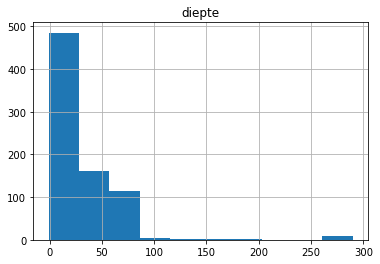

In [42]:
from owslib.etree import etree
from owslib.wfs import WebFeatureService
from owslib.fes import PropertyIsEqualTo

from pydov.util.location import GmlFilter

gemeentegrenzen = WebFeatureService(
    'https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs',
    version='1.1.0')
naam_filter = PropertyIsEqualTo(propertyname='NAAM', literal='Gent')
gemeente_poly = gemeentegrenzen.getfeature(
    typename='VRBG:Refgem',
    filter=etree.tostring(naam_filter.toXML()).decode("utf8")).read()

df = gwv.search(
    location=GmlFilter(gemeente_poly, Within), 
    return_fields=('pkey_vergunning', 'diepte'))
# df.sort_values(by=['diepte'], ascending=False, inplace=True)
df.hist(column='diepte')

In [43]:
df.describe()

,diepte
count,779.000000
mean,30.871207
std,36.867566
min,-1.000000
25%,8.000000
50%,18.000000
75%,46.000000
max,290.000000


### Get permit data, returning fields not available in the standard output dataframe

Not all fields are available in the default output frame. However, you can examine the available fields with the *get_fields()* method and pass the desired field name to the *return_fields* parameter.

In [44]:
from owslib.fes import PropertyIsGreaterThanOrEqualTo

query = PropertyIsGreaterThanOrEqualTo(
            propertyname='diepte',
            literal='200')

df = gwv.search(
    location=GmlFilter(gemeente_poly, Within),
    return_fields=('pkey_vergunning', 'diepte', 'vergunningverlenende_overheid_VVO'))

df.head()

,pkey_vergunning,diepte,vergunningverlenende_overheid_VVO
0,64727,4.0,Gemeentebestuur GENT
1,67206,NaN,Gemeentebestuur GENT
2,63938,7.0,Gemeentebestuur GENT
3,66990,4.0,Gemeentebestuur GENT
4,67208,NaN,Gemeentebestuur GENT


### Estimate groundwater quality data for a certain permit

Given groundwater scarcity in Belgium, the reuse of dewatering drainage is increasingly being considerd. In some cases, this water contains a high iron load which is not desirable for a lot of applications.  
Search in a region for dewatering projects and only keep the ones that are still active, or are granted in the last year, since there is not always an ending time present in the permit

In [45]:
from pydov.util.location import Within, Box
import pandas as pd

# get data
df = gwv.search(location=Within(Box(170000, 172000, 176000, 176000)))

# convert date object column to datetime
# fillna
df.van_datum_termijn.fillna('2000-01-01', inplace=True)
df.tot_datum_termijn.fillna('2000-01-01', inplace=True)
# reset extreme date of 2999 to 2100
df['van_datum_termijn'] = df['van_datum_termijn'].astype(str).replace({'2999': '2100'}, regex=True)
df['tot_datum_termijn'] = df['tot_datum_termijn'].astype(str).replace({'2999': '2100'}, regex=True)
df.van_datum_termijn = pd.to_datetime(df.van_datum_termijn.astype(str))
df.tot_datum_termijn = pd.to_datetime(df.tot_datum_termijn.astype(str))

# create current date and historical date of interest
cdate = pd.Timestamp('2020-09-20')
hdate = pd.Timestamp('2019-09-20')

# only select permits in relation to dewatering or drainage projects
vlarem_dewatering = '53.2|53.3|53.4|53.5'

df = df.loc[(df.vlaremrubriek.str.contains(vlarem_dewatering)) &
            ((df.tot_datum_termijn > cdate) |
             (df.van_datum_termijn > hdate))
              , :]
df.head()

,pkey_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
30,67757,https://www.dov.vlaanderen.be/data/installatie...,171803.89,172669.05,NaN,Katholieke Universiteit Leuven,VLA-00258-A,53.2.2.b)1.,75000.0,NaN,2020-07-29,2000-01-01,0000: Onbekend,Klasse 1 - Vlaams project,85422: Vrij gesubsidieerd hoger onderwijs,1000_waakgebied,NaN,0419052173
39,67756,https://www.dov.vlaanderen.be/data/installatie...,172574.00,174392.00,NaN,AQUAFIN,VLA-00261-A,53.2.2.a),130000.0,NaN,2020-07-14,2021-01-28,0600: Ledo Paniseliaan Brusseliaan Aquifersysteem,Klasse 1 - Vlaams project,37: Afvalwaterafvoer,geen actie/waakgebieden,00418870000022,0440691388
59,65659,https://www.dov.vlaanderen.be/data/installatie...,173139.69,175052.30,3.0,bronbemaling voor rioleringswerken DSV NV,VLB-00525-A,53.2.2.b)1.,50000.0,NaN,2019-10-18,2000-01-01,0000: Onbekend,Klasse 3,0000: onbekend,NaN,NaN,NaN
64,66404,https://www.dov.vlaanderen.be/data/installatie...,173572.87,175204.61,20.0,DCA,VLB-00527-A,53.2.2.b)2.,319000.0,1400.0,2020-03-06,2021-03-06,0620: Zand van Brussel,Klasse 2,41201: Algemene bouw van residentiële gebouwen...,geen actie/waakgebieden,NaN,0450900045
77,65582,https://www.dov.vlaanderen.be/data/installatie...,174416.97,174544.22,22.0,Besix,VLA-00226-A,53.2.2.b)2.,495000.0,2448.0,2019-12-23,2020-05-31,0620: Zand van Brussel,Klasse 2,41201: Algemene bouw van residentiële gebouwen,NaN,NaN,0413630071


Extract for each permit the xy, depth and aquifer hcov code

In [46]:
df['hcov'] = [str(x)[:4] for x in df['aquifer_vergunning']]
df.head()

,pkey_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr,hcov
30,67757,https://www.dov.vlaanderen.be/data/installatie...,171803.89,172669.05,NaN,Katholieke Universiteit Leuven,VLA-00258-A,53.2.2.b)1.,75000.0,NaN,2020-07-29,2000-01-01,0000: Onbekend,Klasse 1 - Vlaams project,85422: Vrij gesubsidieerd hoger onderwijs,1000_waakgebied,NaN,0419052173,0000
39,67756,https://www.dov.vlaanderen.be/data/installatie...,172574.00,174392.00,NaN,AQUAFIN,VLA-00261-A,53.2.2.a),130000.0,NaN,2020-07-14,2021-01-28,0600: Ledo Paniseliaan Brusseliaan Aquifersysteem,Klasse 1 - Vlaams project,37: Afvalwaterafvoer,geen actie/waakgebieden,00418870000022,0440691388,0600
59,65659,https://www.dov.vlaanderen.be/data/installatie...,173139.69,175052.30,3.0,bronbemaling voor rioleringswerken DSV NV,VLB-00525-A,53.2.2.b)1.,50000.0,NaN,2019-10-18,2000-01-01,0000: Onbekend,Klasse 3,0000: onbekend,NaN,NaN,NaN,0000
64,66404,https://www.dov.vlaanderen.be/data/installatie...,173572.87,175204.61,20.0,DCA,VLB-00527-A,53.2.2.b)2.,319000.0,1400.0,2020-03-06,2021-03-06,0620: Zand van Brussel,Klasse 2,41201: Algemene bouw van residentiële gebouwen...,geen actie/waakgebieden,NaN,0450900045,0620
77,65582,https://www.dov.vlaanderen.be/data/installatie...,174416.97,174544.22,22.0,Besix,VLA-00226-A,53.2.2.b)2.,495000.0,2448.0,2019-12-23,2020-05-31,0620: Zand van Brussel,Klasse 2,41201: Algemene bouw van residentiële gebouwen,NaN,NaN,0413630071,0620


In [47]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
from pydov.search.grondwatermonster import GrondwaterMonsterSearch
from pydov.util.query import Join

gfs = GrondwaterFilterSearch()
gwmonster = GrondwaterMonsterSearch()

# get data of filters
df_gfs = gfs.search(location=Within(Box(165000, 165000, 180000, 180000)),
                   return_fields=['pkey_filter', 'x', 'y', 'aquifer', 'diepte_onderkant_filter'])

df_gfs['hcov'] = [str(x)[:4] for x in df_gfs['aquifer']]
df_gfs.diepte_onderkant_filter.fillna(0., inplace=True)
df_gfs['diepte_onderkant_filter'] = df_gfs['diepte_onderkant_filter'].astype(float)

In [48]:
df_gfs.head()

,pkey_filter,x,y,aquifer,diepte_onderkant_filter,hcov
0,https://www.dov.vlaanderen.be/data/filter/2015...,169501.00,169689.00,0620 - Zand van Brussel,0.0,0620
1,https://www.dov.vlaanderen.be/data/filter/2015...,169100.90,169120.30,0163 - Pleistoceen van de riviervalleien,9.0,0163
2,https://www.dov.vlaanderen.be/data/filter/1900...,168936.00,169685.00,0620 - Zand van Brussel,0.0,0620
3,https://www.dov.vlaanderen.be/data/filter/2016...,169297.68,169655.13,1113 - Krijt van Gulpen,112.3,1113
4,https://www.dov.vlaanderen.be/data/filter/2016...,169258.95,169285.66,1113 - Krijt van Gulpen,102.0,1113


In [49]:
# limit search to top 20 m for 

filters = df_gfs.loc[df_gfs['diepte_onderkant_filter'] < 20., :]

df_gwq = gwmonster.search(query=Join(filters, 'pkey_filter'),
                          location=Within(Box(165000, 165000, 180000, 180000)))
df_gwq.head()

[000/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc (4 min. left)
[050/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc (2 min. left)
[100/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[150/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[200/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[250/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[300/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[350/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[400/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[450/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[500/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[550/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[600/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[650/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[700/2100] cccccccccccccccccccccccccccccccccccccccccccccccccc
[750/2100] ccccccccccccccccccccccccccccccc

AttributeError: 'NoneType' object has no attribute 'findall'

Evaluate monitoring results

In [29]:
df_gwq['parameter'] = df_gwq['parameter'].str.encode('utf-8')
df_gwq['parameter'].unique()

NameError: name 'df_gwq' is not defined

In [22]:
pars_select = [b'Fe', b'Fe2+', b'Fe(Tot.)', b'Fe3+']
df_selected = df_gwq.loc[df_gwq.parameter.isin(pars_select), :]
df_selected.head()

,pkey_grondwatermonster,grondwatermonsternummer,pkey_grondwaterlocatie,gw_id,pkey_filter,filternummer,x,y,start_grondwaterlocatie_mtaw,gemeente,datum_monstername,parametergroep,parameter,detectie,waarde,eenheid,veld_labo
3,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0504,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-10-19,Kationen,b'Fe',NaN,9.600,mg/l,LABO
39,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0503,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-06-29,Kationen,b'Fe',NaN,8.430,mg/l,LABO
63,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0503,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-06-29,Kationen,b'Fe2+',NaN,7.950,mg/l,VELD
81,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0401,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2004-06-10,Kationen,b'Fe',NaN,7.716,mg/l,LABO
85,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0401,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2004-06-10,Kationen,b'Fe2+',NaN,3.500,mg/l,LABO


Link monitoring data with filter locations and plot barchart of selected water quality variables. Only background variables, because average of aquifer unit is taken.

In [23]:
df_selected = df_selected.join(df_gfs.loc[:, ['pkey_filter', 'hcov']].set_index('pkey_filter'), on='pkey_filter')
df_selected.head()

,pkey_grondwatermonster,grondwatermonsternummer,pkey_grondwaterlocatie,gw_id,pkey_filter,filternummer,x,y,start_grondwaterlocatie_mtaw,gemeente,datum_monstername,parametergroep,parameter,detectie,waarde,eenheid,veld_labo,hcov
3,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0504,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-10-19,Kationen,b'Fe',NaN,9.600,mg/l,LABO,0620
39,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0503,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-06-29,Kationen,b'Fe',NaN,8.430,mg/l,LABO,0620
63,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0503,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2005-06-29,Kationen,b'Fe2+',NaN,7.950,mg/l,VELD,0620
81,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0401,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2004-06-10,Kationen,b'Fe',NaN,7.716,mg/l,LABO,0620
85,https://www.dov.vlaanderen.be/data/watermonste...,711/71/1/M0401,https://www.dov.vlaanderen.be/data/put/2017-00...,711/71/1,https://www.dov.vlaanderen.be/data/filter/2003...,1,166673.703125,167700.953125,50.95,Huldenberg,2004-06-10,Kationen,b'Fe2+',NaN,3.500,mg/l,LABO,0620


In [24]:
df_selected.hcov.unique()

array(['0620', '0000', '0140', '0600', '0450', '0252', '0150', '0923',
       '0100', '0200', '0612', '0800', '0151', '0610', '0163'],
      dtype=object)

In [25]:
df_sub = df_selected.loc[[x[:2] in ['00', '01', '02'] for x in df_selected.hcov], :]
df_sub.head()

,pkey_grondwatermonster,grondwatermonsternummer,pkey_grondwaterlocatie,gw_id,pkey_filter,filternummer,x,y,start_grondwaterlocatie_mtaw,gemeente,datum_monstername,parametergroep,parameter,detectie,waarde,eenheid,veld_labo,hcov
1737,https://www.dov.vlaanderen.be/data/watermonste...,IJSP025-39101,https://www.dov.vlaanderen.be/data/put/2018-00...,IJSP025,https://www.dov.vlaanderen.be/data/filter/2001...,1,166916.0,165983.0,42.69,Huldenberg,2015-11-20,Kationen,b'Fe(Tot.)',NaN,16.000,mg/l,LABO,0000
3297,https://www.dov.vlaanderen.be/data/watermonste...,IJSP023-39359,https://www.dov.vlaanderen.be/data/put/2018-00...,IJSP023,https://www.dov.vlaanderen.be/data/filter/2001...,1,166813.0,166073.0,35.80,Huldenberg,2017-02-01,Kationen,b'Fe(Tot.)',NaN,13.980,mg/l,LABO,0000
3364,https://www.dov.vlaanderen.be/data/watermonste...,IJSP026-39388,https://www.dov.vlaanderen.be/data/put/2018-00...,IJSP026,https://www.dov.vlaanderen.be/data/filter/2001...,1,166954.0,165960.0,45.31,Huldenberg,2017-02-01,Kationen,b'Fe(Tot.)',NaN,9.760,mg/l,LABO,0140
22377,https://www.dov.vlaanderen.be/data/watermonste...,KASP006-40546,https://www.dov.vlaanderen.be/data/put/2018-00...,KASP006,https://www.dov.vlaanderen.be/data/filter/2011...,1,169462.0,178227.0,22.59,Herent,2020-03-17,Kationen,b'Fe(Tot.)',NaN,3.837,mg/l,LABO,0000
22381,https://www.dov.vlaanderen.be/data/watermonste...,KASP007-40544,https://www.dov.vlaanderen.be/data/put/2018-00...,KASP007,https://www.dov.vlaanderen.be/data/filter/2011...,1,169563.0,178486.0,21.22,Herent,2020-03-17,Kationen,b'Fe(Tot.)',NaN,0.102,mg/l,LABO,0000


In [26]:
result = df_sub.groupby(['hcov', 'parameter']).agg({'waarde': [min, max, 'mean', 'std', 'count']})
# result.to_csv('C:\\test\\test.csv')
result.head()

waarde                                    
                    min      max      mean        std count
hcov parameter                                             
0000 b'Fe(Tot.)'   0.05  102.790  7.628568  15.133258    95
0100 b'Fe'         0.00    0.900  0.150375   0.308696     8
     b'Fe2+'       0.02    0.070  0.036667   0.028868     3
0140 b'Fe'         0.00    0.610  0.093272   0.141697    25
     b'Fe(Tot.)'   0.05   93.689  6.189564  13.238644    78

In [27]:
result.reset_index(inplace=True)
result.columns = result.columns.droplevel(0)
#pandas 0.18.0 and higher
result = result.rename_axis(None, axis=1)
result.head()

,,,min,max,mean,std,count
0,0000,b'Fe(Tot.)',0.05,102.790,7.628568,15.133258,95
1,0100,b'Fe',0.00,0.900,0.150375,0.308696,8
2,0100,b'Fe2+',0.02,0.070,0.036667,0.028868,3
3,0140,b'Fe',0.00,0.610,0.093272,0.141697,25
4,0140,b'Fe(Tot.)',0.05,93.689,6.189564,13.238644,78


In [1]:
import seaborn as sns
boxplot = result.boxplot(column='parameter', by='hcov')

NameError: name 'result' is not defined

In [ ]:
len(df_gwq.gw_id.unique())

In [ ]:
df_gwq['parameter'] = df_gwq['parameter'].str.encode('utf-8')

In [ ]:
# get filters closest to each permit with measurements in the last year in the aquifer of interest
# this doesn't work because not all gwmonster actually contain data. So you must download all and then check.
from scipy import spatial
df_pts = pd.DataFrame()
for hcov, df_tmp in df.groupby('hcov'):
    #In df.groupby('hcov').apply(extract_wq_id) don't do this since iteration over rows!
    fpts = df_gfs.loc[df_gfs['hcov'] == hcov, ['pkey_filter', 'x', 'y']].values
    ppts = df.loc[df['hcov'] == hcov, ['pkey_vergunning', 'x', 'y']].values
    if fpts.shape[0] == 0:
        df_tmp['hcov'] = hcov
        df_tmp['pkey_filter'] = None
        print(str(hcov) + ' passing')
    else:
        tree = spatial.KDTree(fpts[:, 1:])
        d, i = tree.query(ppts[:, 1:])
        df_tmp['hcov'] = hcov
        df_tmp['pkey_filter'] = [fpts[idx, 0] for idx in i]
    print(str(hcov), len(df_tmp), len(fpts), len(ppts))
    df_pts = df_pts.append(df_tmp, ignore_index=True)
df_pts.head()

In [ ]:
df_gfs.loc[df_gfs['pkey_filter']=="https://www.dov.vlaanderen.be/data/filter/2003-005503", :]

In [ ]:
df_pts.loc[df_gfs['hcov']=="0620"]['pkey_filter'].values

In [ ]:
df_gwq_n = gwmonster.search(query=Join(df_pts, 'pkey_filter'))
print(df_gwq.shape)
df_gwq_n.head()

## Visualize results

Using Folium, we can display the results of our search on a map.

In [ ]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [ ]:
# convert the coordinates to lat/lon for folium
def convert_latlon(x1, y1):
    transformer = Transformer.from_crs("epsg:31370", "epsg:4326", always_xy=True)
    x2,y2 = transformer.transform(x1, y1)
    return x2, y2

df['lon'], df['lat'] = zip(*map(convert_latlon, df['x'], df['y'])) 
# convert to list
loclist = df[['lat', 'lon']].values.tolist()

In [ ]:
# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(fmap)
for loc in range(0, len(loclist)):
    folium.Marker(loclist[loc], popup=df['boornummer'][loc]).add_to(marker_cluster)
fmap
